In [1]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
X_tr = np.loadtxt('train_X.csv', delimiter=',').T
Y_tr = np.loadtxt('train_label.csv', delimiter=',').T

In [3]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
X_te = np.loadtxt('test_X.csv', delimiter=',').T
Y_te = np.loadtxt('test_label.csv', delimiter=',').T

In [4]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
X_tr.shape, Y_tr.shape, X_te.shape, Y_te.shape

((784, 1000), (10, 1000), (784, 350), (10, 350))

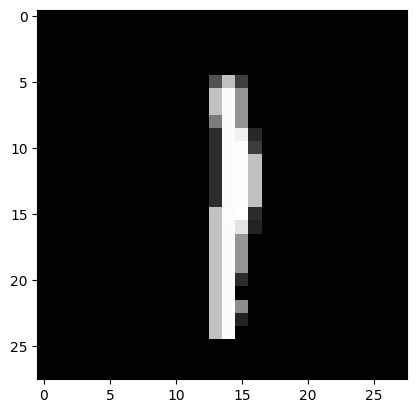

In [5]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
index = random.randrange(0,X_tr.shape[1])
plt.imshow(X_tr[:,index].reshape(28,28), cmap='gray')
plt.show()

In [6]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer

def Softmax(x):
    e_x = np.exp(x)
    return e_x/np.sum(e_x, axis = 0)

def tanh(x):
    return np.tanh(x)

def ReLu(x):
    return np.maximum(x,0)

def dev_tanh(x):
    return (1 - np.power(np.tanh(x),2))

def dev_ReLu(x):
    return np.array(x>0, dtype=np.float32)

In [7]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
import numpy as np

def Initial_parameter(In_l, hl_1, hl_2, Out_l):
    w_1 = np.random.randn(hl_1, In_l) * 0.01
    b_1 = np.zeros((hl_1, 1))

    w_2 = np.random.randn(hl_2, hl_1) * 0.01
    b_2 = np.zeros((hl_2, 1))

    w_3 = np.random.randn(Out_l, hl_2) * 0.01
    b_3 = np.zeros((Out_l, 1))

    paramet = {"w_1": w_1, "w_2": w_2, "w_3": w_3,
               "b_1": b_1, "b_2": b_2, "b_3": b_3}
    return paramet

def tanh(z):
    return np.tanh(z)

def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum(axis=0, keepdims=True)

def dev_tanh(z):
    return 1 - np.tanh(z)**2


# This section performs forward propagation through the network
# z_1, z_2, z_3 are the linear combinations of inputs and weights
# a_1, a_2, a_3 are the activations after applying the activation functions
def forward_propagation(x, paramet):
    w_1 = paramet['w_1']
    w_2 = paramet['w_2']
    w_3 = paramet['w_3']
    b_1 = paramet['b_1']
    b_2 = paramet['b_2']
    b_3 = paramet['b_3']

    z_1 = np.dot(w_1, x) + b_1
    a_1 = tanh(z_1)

    z_2 = np.dot(w_2, a_1) + b_2
    a_2 = tanh(z_2)

    z_3 = np.dot(w_3, a_2) + b_3
    a_3 = softmax(z_3)

    forward = {'z_1': z_1, 'z_2': z_2, 'z_3': z_3,
               'a_1': a_1, 'a_2': a_2, 'a_3': a_3}
    return forward


# This function calculates the cost using cross-entropy loss
def Cost_fun(a_3, y):
    Out_n = y.shape[1]
    cost = -(1 / Out_n) * np.sum(y * np.log(a_3))
    return cost


# This section performs backward propagation to calculate the gradients
# dz_1, dz_2, dz_3 are the gradients of the cost with respect to z_1, z_2, z_3
# dw_1, dw_2, dw_3 are the gradients of the cost with respect to the weights
# db_1, db_2, db_3 are the gradients of the cost with respect to the biases
def backward_propagation(x, y, paramet, forward):
    w_1 = paramet['w_1']
    w_2 = paramet['w_2']
    w_3 = paramet['w_3']
    b_1 = paramet['b_1']
    b_2 = paramet['b_2']
    b_3 = paramet['b_3']

    a_1 = forward['a_1']
    a_2 = forward['a_2']
    a_3 = forward['a_3']

    Out_n = x.shape[1]

    dz_3 = a_3 - y
    dw_3 = (1 / Out_n) * np.dot(dz_3, a_2.T)
    db_3 = (1 / Out_n) * np.sum(dz_3, axis=1, keepdims=True)

    dz_2 = np.dot(w_3.T, dz_3) * dev_tanh(a_2)
    dw_2 = (1 / Out_n) * np.dot(dz_2, a_1.T)
    db_2 = (1 / Out_n) * np.sum(dz_2, axis=1, keepdims=True)

    dz_1 = np.dot(w_2.T, dz_2) * dev_tanh(a_1)
    dw_1 = (1 / Out_n) * np.dot(dz_1, x.T)
    db_1 = (1 / Out_n) * np.sum(dz_1, axis=1, keepdims=True)

    gradient = {'dw_1': dw_1, 'dw_2': dw_2, 'dw_3': dw_3,
                'db_1': db_1, 'db_2': db_2, 'db_3': db_3}
    return gradient


# This function updates the parameters using the calculated gradients and learning rate
def update_paramet(paramet, gradient, lr):
    w_1 = paramet['w_1']
    b_1 = paramet['b_1']
    w_2 = paramet['w_2']
    b_2 = paramet['b_2']
    w_3 = paramet['w_3']
    b_3 = paramet['b_3']

    dw_1 = gradient['dw_1']
    db_1 = gradient['db_1']
    dw_2 = gradient['dw_2']
    db_2 = gradient['db_2']
    dw_3 = gradient['dw_3']
    db_3 = gradient['db_3']

    w_1 -= lr * dw_1
    b_1 -= lr * db_1
    w_2 -= lr * dw_2
    b_2 -= lr * db_2
    w_3 -= lr * dw_3
    b_3 -= lr * db_3

    parameters = {"w_1": w_1, "b_1": b_1, "w_2": w_2, "b_2": b_2,
                  "w_3": w_3, "b_3": b_3}
    return parameters


# This is the main model function that trains the neural network
# It initializes parameters, performs forward and backward propagation, updates parameters, and tracks the cost
def model(x, y, hl_1, hl_2, lr, interation):
    n_x = x.shape[0]
    n_y = y.shape[0]

    cost_list = []
    paramet = Initial_parameter(n_x, hl_1, hl_2, n_y)

    for i in range(interation):
        forward = forward_propagation(x, paramet)
        cost = Cost_fun(forward['a_3'], y)
        gradient = backward_propagation(x, y, paramet, forward)
        paramet = update_paramet(paramet, gradient, lr)
        cost_list.append(cost)

        if i % (interation / 10) == 0:
            print("Cost function at iteration", i, ":", cost)

    return paramet, cost_list


In [8]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
inter = 1000
hl_1 = 500
hl_2 = 200
lr = 0.1
paramet, cost_list = model(X_tr, Y_tr,hl_1, hl_2,lr,inter)

Cost function at iteration 0 : 2.3008145722970066
Cost function at iteration 100 : 0.14477557723804296
Cost function at iteration 200 : 0.038032533050663044
Cost function at iteration 300 : 0.01618872799072139
Cost function at iteration 400 : 0.009508740737849955
Cost function at iteration 500 : 0.0065615835796440135
Cost function at iteration 600 : 0.004961147164777054
Cost function at iteration 700 : 0.003942700676741409
Cost function at iteration 800 : 0.003237226322031426
Cost function at iteration 900 : 0.002756127054620829


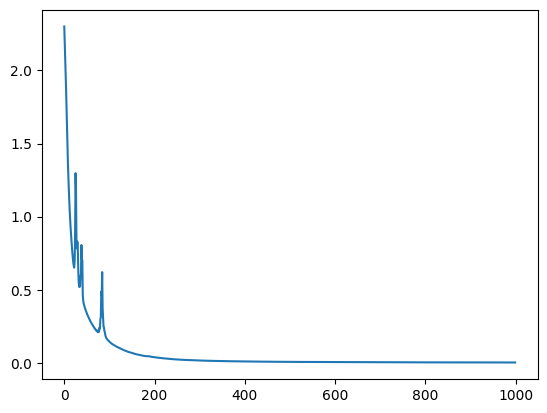

In [9]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer

plt.plot(np.arange(0, inter), cost_list)
plt.show()

In [10]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
def Accuaracy(inp, labels, paramet):
    forward = forward_propagation(inp,paramet)
    a_out = forward['a_3']

    a_out = np.argmax(a_out,0)
    labels = np.argmax(labels, 0)
    accuracy = np.mean(a_out==labels)*100
    return accuracy


In [11]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
print(f"Accuracy of Train Dataset{ Accuaracy(X_tr, Y_tr, paramet)}%")
print(f"Accuracy of Test Dataset{ round(Accuaracy(X_te, Y_te, paramet), 2)}%")

Accuracy of Train Dataset100.0%
Accuracy of Test Dataset84.86%


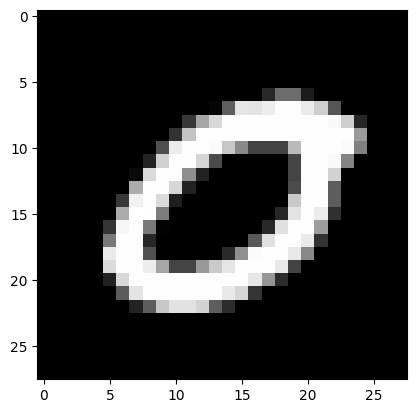

The prediction is : 0


In [12]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
idx = int(random.randrange(0,X_tr.shape[1]))
plt.imshow(X_tr[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_tr[:, idx].reshape(X_tr[:, idx].shape[0], 1), paramet)
a_pred = cache['a_3']  
a_pred = np.argmax(a_pred, 0)

print("The prediction is :", a_pred[0])

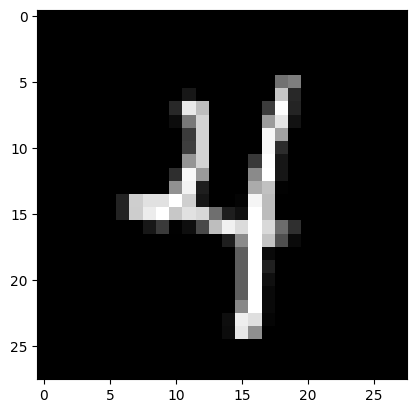

The prediction is : 4


In [13]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
idx = int(random.randrange(0,X_te.shape[1]))
plt.imshow(X_te[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_te[:, idx].reshape(X_te[:, idx].shape[0], 1), paramet)
a_pred = cache['a_3']  
a_pred = np.argmax(a_pred, 0)

print("The prediction is :", a_pred[0])

In [14]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer


In [15]:

# This section initializes the parameters for the neural network
# w_1, w_2, w_3 are the weights for each layer
# b_1, b_2, b_3 are the biases for each layer
